In [1]:
import scipy.io
import pandas as pd
import numpy as np
from keras.utils import np_utils
import scikitplot as skplt
import matplotlib.pyplot as plt
import sys
import pickle
from keras import metrics

C:\Users\Nimish Patel\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


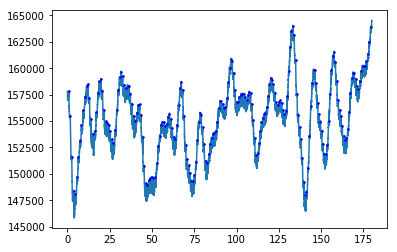

In [2]:
## Plotting the data

rec_fs = 512
rec_subj_name = "sub01"

test_pickle = pickle.load(open(str(rec_subj_name) + ".p", "rb"))

experiment = "ex_paced"

for ex in ["10bpm"]: plt.plot(test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["t"],
test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["ppg_g"])
    
for ex in ["10bpm"]:
    pks = test_pickle[experiment][ex]["earlobe-wrist"]["earlobe"]["pks_g"]
    if len(pks) != 0:
        plt.plot(pks[1], pks[2], color='blue', linestyle='None', marker='o', markersize=1.5, alpha=1.0)
        
#print(pks[1])
#print(pks[2])

In [3]:
## Data Prepration

ppg_g1 = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["ppg_g"])
t = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["t"])
ppg_g = (np.vstack((ppg_g1,t)).T)

acc_X1 = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["acc_x"])
acc_X = (np.vstack((acc_X1,t)).T)
acc_Y1 = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["acc_y"])
acc_Y = (np.vstack((acc_Y1,t)).T)
acc_Z1 = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["acc_z"])
acc_Z = (np.vstack((acc_Z1,t)).T)

peaks = np.asarray(test_pickle[experiment]["10bpm"]["earlobe-wrist"]["earlobe"]["pks_g"][1:])
peaks = np.transpose(peaks)
peak_points = peaks[:,0]

data1 = np.concatenate((ppg_g, acc_X), axis=1)
data2 = np.concatenate((data1, acc_Y), axis=1)
data3 = np.concatenate((data2, acc_Z), axis=1)
#print(np.shape(data3))
#print(data3)

data = data3[:,[0,1,2,4,6]]
#print(np.shape(data))
#print(data)


#print(ppg_g)
#print(t)
#print(peaks)
#print(acc_X)
#print(np.shape(examples))
#print(np.shape(peaks))
#print(peak_points)

In [4]:
## Transfer into binary Classification

output = []
for value in t :
        if value in peak_points:
            output.append(1)
        else:
            output.append(0)

output = np.asarray(output)
#print(np.shape(output))

output = output.reshape(output.shape[0],1)
#print(np.shape(output))
#print(output)

(92160, 1)


In [ ]:
## Selecting some the datapoints to balance the classes

new_all = np.concatenate((data, output), axis=1)
#print(np.shape(new_all))
#print(new_all)

y = [new_all[new_all[:,5]==1] for k in np.unique(new_all[:,5])]
x = [new_all[new_all[:,5]==0] for k in np.unique(new_all[:,5])]
#print(np.shape(y))
#print(np.shape(x))

x = np.delete(x, slice(0, 91160), axis=1)
#print(np.shape(x))
new_all = np.concatenate((x, y), axis=1)
#print(np.shape(new_all))
#print(new_all)
np.random.shuffle(new_all)

new_all = new_all[0,:,:]

data = new_all[:,[0,1,2,3,4]]
output = new_all[:,[5]]

#print(np.shape(data))
#print(np.shape(output))

#print(output)
#print(data)


In [5]:
## Changing Shape of input

data = data.reshape(data.shape[0],data.shape[1],1)
#print(np.shape(data))

(92160, 5, 1)


In [15]:
## Creating a Network MPL

from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Flatten
model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_21 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 80)                10320     
_________________________________________________________________
dense_23 (Dense)             (None, 80)                6480      
_________________________________________________________________
dropout_7 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 60)                4860      
__________

In [10]:
## Creating Network CNN

from keras.models import Sequential
from keras.layers import Conv1D,Dense,Activation,Flatten, Dropout,MaxPooling1D, GlobalAveragePooling1D
model=Sequential()
model.add(Conv1D(128,1,activation='relu',input_shape=(5,1)))
model.add(Conv1D(128, 1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(100, 1, activation='relu'))
model.add(Conv1D(100, 1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(60, 1, activation='relu'))
model.add(Conv1D(60, 1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(10, 1, activation='relu'))
model.add(Conv1D(10, 1, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(1,activation='softmax'))
model.summary()


model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_17 (Conv1D)           (None, 5, 128)            256       
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 5, 128)            16512     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 5, 128)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 5, 100)            12900     
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 5, 100)            10100     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 5, 100)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 5, 60)             6060      
__________

In [11]:
## Fit the Model
model.fit(data, output, epochs=20, batch_size=128)

## Find the accuracy of the Model
_, accuracy = model.evaluate(data, output, batch_size=128)
print(accuracy)

Epoch 1/20
92160/92160 [==============================] - 23s 253us/step - loss: 15.9059 - acc: 0.0023
Epoch 2/20
92160/92160 [==============================] - 23s 249us/step - loss: 15.9059 - acc: 0.0023s - loss: 15.9056 - acc: 
Epoch 3/20
92160/92160 [==============================] - 20s 219us/step - loss: 15.9059 - acc: 0.0023
Epoch 4/20
92160/92160 [==============================] - 20s 219us/step - loss: 15.9059 - acc: 0.0023
Epoch 5/20
92160/92160 [==============================] - 20s 212us/step - loss: 15.9059 - acc: 0.0023
Epoch 6/20
92160/92160 [==============================] - 20s 214us/step - loss: 15.9059 - acc: 0.0023
Epoch 7/20
92160/92160 [==============================] - 19s 205us/step - loss: 15.9059 - acc: 0.0023
Epoch 8/20
92160/92160 [==============================] - 19s 210us/step - loss: 15.9059 - acc: 0.0023
Epoch 9/20
92160/92160 [==============================] - 20s 215us/step - loss: 15.9059 - acc: 0.0023
Epoch 10/20
92160/92160 [=======================

In [ ]:
## Preparing the prediction data

Predict_ppg_g1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["ppg_g"])
Predict_t = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["t"])
Predict_ppg_g = (np.vstack((Predict_ppg_g1,t)).T)

Predict_acc_X1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_x"])
Predict_acc_X = (np.vstack((Predict_acc_X1,t)).T)
Predict_acc_Y1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_y"])
Predict_acc_Y = (np.vstack((Predict_acc_Y1,t)).T)
Predict_acc_Z1 = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["acc_z"])
Predict_acc_Z = (np.vstack((Predict_acc_Z1,t)).T)

Predict_peaks = np.asarray(test_pickle[experiment]["12bpm"]["earlobe-wrist"]["earlobe"]["pks_g"][1:])
Predict_peaks = np.transpose(Predict_peaks)
Predict_peak_points = Predict_peaks[:,0]

Predict_data1 = np.concatenate((Predict_ppg_g, Predict_acc_X), axis=1)
Predict_data2 = np.concatenate((Predict_data1, Predict_acc_Y), axis=1)
Predict_data3 = np.concatenate((Predict_data2, Predict_acc_Z), axis=1)

#print(np.shape(Predict_data3))
#print(Predict_data3)

Predict_data = Predict_data3[:,[0,1,2,4,6]]
#print(np.shape(Predict_data))



In [ ]:
## Transfer into binary Classification for Prediction

Predict_output = []
for value in Predict_t :
        if value in Predict_peak_points:
            Predict_output.append(1)
        else:
            Predict_output.append(0)

Predict_output = np.asarray(Predict_output)

#print(np.shape(output))
Predict_output = Predict_output.reshape(Predict_output.shape[0],1)
#print(np.shape(Predict_output))
#print(output)

In [ ]:
## Selecting some the datapoints to balance the classes

Predict_new_all = np.concatenate((Predict_data, Predict_output), axis=1)
#print(np.shape(Predict_new_all))
#print(new_all)

Predict_y = [Predict_new_all[Predict_new_all[:,5]==1] for k in np.unique(Predict_new_all[:,5])]
Predict_x = [Predict_new_all[Predict_new_all[:,5]==0] for k in np.unique(Predict_new_all[:,5])]
#print(np.shape(Predict_y))
#print(np.shape(Predict_x))

Predict_x = np.delete(Predict_x, slice(0, 91160), axis=1)
#print(np.shape(Predict_x))
Predict_new_all = np.concatenate((Predict_x, Predict_y), axis=1)
#print(np.shape(Predict_new_all))
#print(Predict_new_all)
np.random.shuffle(Predict_new_all)

Predict_new_all = Predict_new_all[0,:,:]

Predict_data = Predict_new_all[:,[0,1,2,3,4]]
Predict_output = Predict_new_all[:,[5]]
#print(np.shape(Predict_data))
#print(np.shape(Predict_output))

#print(Predict_output)
#print(Predict_data)


In [ ]:
## Changing shape of input for prediction

Predict_data = Predict_data.reshape(Predict_data.shape[0],Predict_data.shape[1],1)
print(np.shape(Predict_data))

In [ ]:
## Predict the new data using model

Predicted_output = model.predict_classes(Predict_data)
#print(Predicted_output)
#print(np.shape(Predicted_output))


In [ ]:
## Find the accuracy of Predicted data

print("\n Confusion_Matrix: \n")
skplt.metrics.plot_confusion_matrix(Predict_output, Predicted_output, title="Confusion Matrix",text_fontsize='large')
plt.show()
